In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

In [2]:
df = pd.read_csv('6_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.063261,-0.475459,-1.051227,-0.673594,-0.961250,-0.434981,-0.678707,-0.964273,-0.654252,-0.682110,-0.980531,0
1,-1.058426,2.297856,-0.588907,-0.663036,-0.949243,-0.434981,-0.678707,-0.941317,-0.654252,-0.615374,1.039764,1
2,-0.926402,-0.475459,-1.051227,-0.673370,-0.933257,-0.434981,-0.271893,-0.931369,-0.654252,-0.682110,-0.980531,0
3,-1.000980,2.384331,0.185735,-0.542220,-0.936553,-0.434981,-0.678707,-0.938452,2.232193,-0.640785,0.591410,1
4,-1.003501,-0.475459,-0.548078,-0.504770,-0.946157,-0.434981,-0.678707,-0.840801,-0.654252,-0.682110,-0.980531,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,-1.063261,-0.475459,-1.051227,-0.673594,-0.961250,-0.434981,-0.678707,-0.964273,-0.654252,-0.682110,-0.980531
1,-1.058426,2.297856,-0.588907,-0.663036,-0.949243,-0.434981,-0.678707,-0.941317,-0.654252,-0.615374,1.039764
2,-0.926402,-0.475459,-1.051227,-0.673370,-0.933257,-0.434981,-0.271893,-0.931369,-0.654252,-0.682110,-0.980531
3,-1.000980,2.384331,0.185735,-0.542220,-0.936553,-0.434981,-0.678707,-0.938452,2.232193,-0.640785,0.591410
4,-1.003501,-0.475459,-0.548078,-0.504770,-0.946157,-0.434981,-0.678707,-0.840801,-0.654252,-0.682110,-0.980531
...,...,...,...,...,...,...,...,...,...,...,...
4039,-0.315282,3.274083,-0.894352,-0.523322,-0.830738,-0.434981,-0.678707,-0.498799,-0.654252,-0.551084,-0.192939
4040,0.162266,1.170820,-0.430620,-0.452432,0.774542,-0.434981,0.922936,0.025415,-0.654252,1.489723,0.049492
4041,-0.661624,-0.475459,-0.898638,-0.639784,0.028913,-0.434981,-0.351114,0.077245,1.896840,-0.682110,3.181057
4042,0.237561,-0.475459,0.467104,-0.626955,-0.919148,-0.434981,-0.678707,-0.435644,-0.654252,-0.682110,-0.095822


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1636
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_nb:  [0.6494505494505495, 0.6449320148331273, 0.645708230307312, 0.6530696332921302, 0.6547972304648862, 0.6520395550061805, 0.6622734761120264, 0.6662546353522868, 0.6592592592592592]
positive_predictive_values_nb:  [0.7227722772277227, 0.7185134205092911, 0.7107692307692308, 0.7102473498233216, 0.7091295116772823, 0.7158774373259053, 0.7251356238698011, 0.7158176943699732, 0.7318435754189944]
recalls_nb:  [0.5851703406813628, 0.5852017937219731, 0.5957446808510638, 0.6100151745068285, 0.6117216117216118, 0.588774341351661, 0.6084977238239757, 0.6194895591647331, 0.5927601809954751]
f1_scores_nb:  [0.646733111849391, 0.6450417052826691, 0.6481936162749913, 0.6563265306122449, 0.6568338249754179, 0.6461345065996229, 0.6617161716171617, 0.664179104477612, 0.655]
specificities_nb:  [0.7274939172749392, 0.7183195592286501, 0.70625, 0.7042380522993688, 0.7053763440860215, 0.7261744966442953, 0.7261261261261261, 0.7195767195767195, 0.7391304347826086]
npvs_nb:  [0.590909090909090

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2117
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.6574175824175824, 0.6569839307787392, 0.6580713528788414, 0.6876802637000412, 0.6993076162215628, 0.6990111248454882, 0.700164744645799, 0.7008652657601978, 0.7407407407407407]
positive_predictive_values_dtc:  [0.6764427625354777, 0.6910846110164679, 0.6858407079646017, 0.723823975720789, 0.7383773928896992, 0.734321550741163, 0.7417910447761195, 0.7438202247191011, 0.7787610619469026]
recalls_dtc:  [0.7175112895132966, 0.6825574873808189, 0.6973007712082262, 0.7077151335311572, 0.7161803713527851, 0.7171492204899778, 0.7223837209302325, 0.7211328976034859, 0.7619047619047619]
f1_scores_dtc:  [0.6963720477233991, 0.6867945823927766, 0.691523263224984, 0.7156789197299325, 0.7271095152603232, 0.7256338028169014, 0.7319587628865979, 0.7323008849557522, 0.7702407002188184]
specificities_dtc:  [0.5846994535519126, 0.6256022023399862, 0.6101960784313726, 0.6626506024096386, 0.6778900112233446, 0.6763888888888889, 0.6711026615969582, 0.6742857142857143, 0.7126436781609196]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 378
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionW

accuracies_rf:  [0.6928571428571428, 0.734857849196539, 0.7548569410102437, 0.7663782447466008, 0.7818991097922848, 0.7892459826946848, 0.7990115321252059, 0.8084054388133498, 0.8098765432098766]
positive_predictive_values_rf:  [0.7036188731103985, 0.7385955920041004, 0.7388888888888889, 0.758226997985225, 0.7776879547291835, 0.7858585858585858, 0.7989487516425755, 0.8031189083820662, 0.8022388059701493]
recalls_rf:  [0.7653213751868461, 0.8054779206260481, 0.8558558558558559, 0.8450598802395209, 0.8528368794326241, 0.8577728776185226, 0.8698140200286123, 0.8841201716738197, 0.899581589958159]
f1_scores_rf:  [0.7331742243436754, 0.7705882352941177, 0.793082886106142, 0.7992920353982301, 0.8135306553911205, 0.8202424881391671, 0.8328767123287671, 0.8416751787538305, 0.8481262327416174]
specificities_rf:  [0.6037966932026945, 0.6475466482377332, 0.6319498825371965, 0.6700274977085243, 0.6923937360178971, 0.7018284106891702, 0.7029126213592233, 0.7055393586005831, 0.6807228915662651]
npvs

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 964
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

accuracies_knn:  [0.6173076923076923, 0.6279357231149567, 0.6347580360296715, 0.6456530696332922, 0.6488625123639961, 0.6749072929542645, 0.6787479406919276, 0.6662546353522868, 0.6617283950617284]
positive_predictive_values_knn:  [0.6636794939377966, 0.6725352112676056, 0.6775884665792923, 0.6896024464831805, 0.6963636363636364, 0.7083786724700761, 0.717008797653959, 0.702355460385439, 0.6779661016949152]
recalls_knn:  [0.625124131082423, 0.6395089285714286, 0.6560913705583756, 0.6651917404129793, 0.670753064798599, 0.7161716171617162, 0.7128279883381924, 0.7145969498910676, 0.7239819004524887]
f1_scores_knn:  [0.6438251086678599, 0.6556064073226545, 0.6666666666666666, 0.6771771771771772, 0.6833184656556646, 0.712253829321663, 0.7149122807017544, 0.7084233261339092, 0.700218818380744]
specificities_knn:  [0.6076260762607626, 0.6135734072022161, 0.6079681274900398, 0.6209150326797386, 0.6204545454545455, 0.6220028208744711, 0.634469696969697, 0.6028571428571429, 0.5869565217391305]
np

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 2600
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_svm:  [0.6717032967032966, 0.6727441285537701, 0.6806782055810667, 0.6860321384425216, 0.6879327398615233, 0.6928306551297899, 0.7018121911037891, 0.7033374536464772, 0.6987654320987654]
positive_predictive_values_svm:  [0.6998528690534576, 0.6912151499210941, 0.6876443418013857, 0.7094499294781382, 0.7046925566343042, 0.7235602094240837, 0.7249322493224932, 0.7372708757637475, 0.7283464566929134]
recalls_svm:  [0.7099502487562189, 0.7357222844344905, 0.7664092664092664, 0.7418879056047197, 0.7660510114335972, 0.7478354978354979, 0.770893371757925, 0.7653276955602537, 0.7773109243697479]
f1_scores_svm:  [0.704865398863917, 0.7127746135069162, 0.7248934875228241, 0.7253064167267483, 0.7340918668352296, 0.7354976051091006, 0.7472067039106145, 0.7510373443983402, 0.7520325203252033]
specificities_svm:  [0.6245398773006134, 0.5951724137931035, 0.5763508222396241, 0.61531279178338, 0.5875706214689266, 0.6195965417867435, 0.6096153846153847, 0.6160714285714286, 0.5868263473053892]

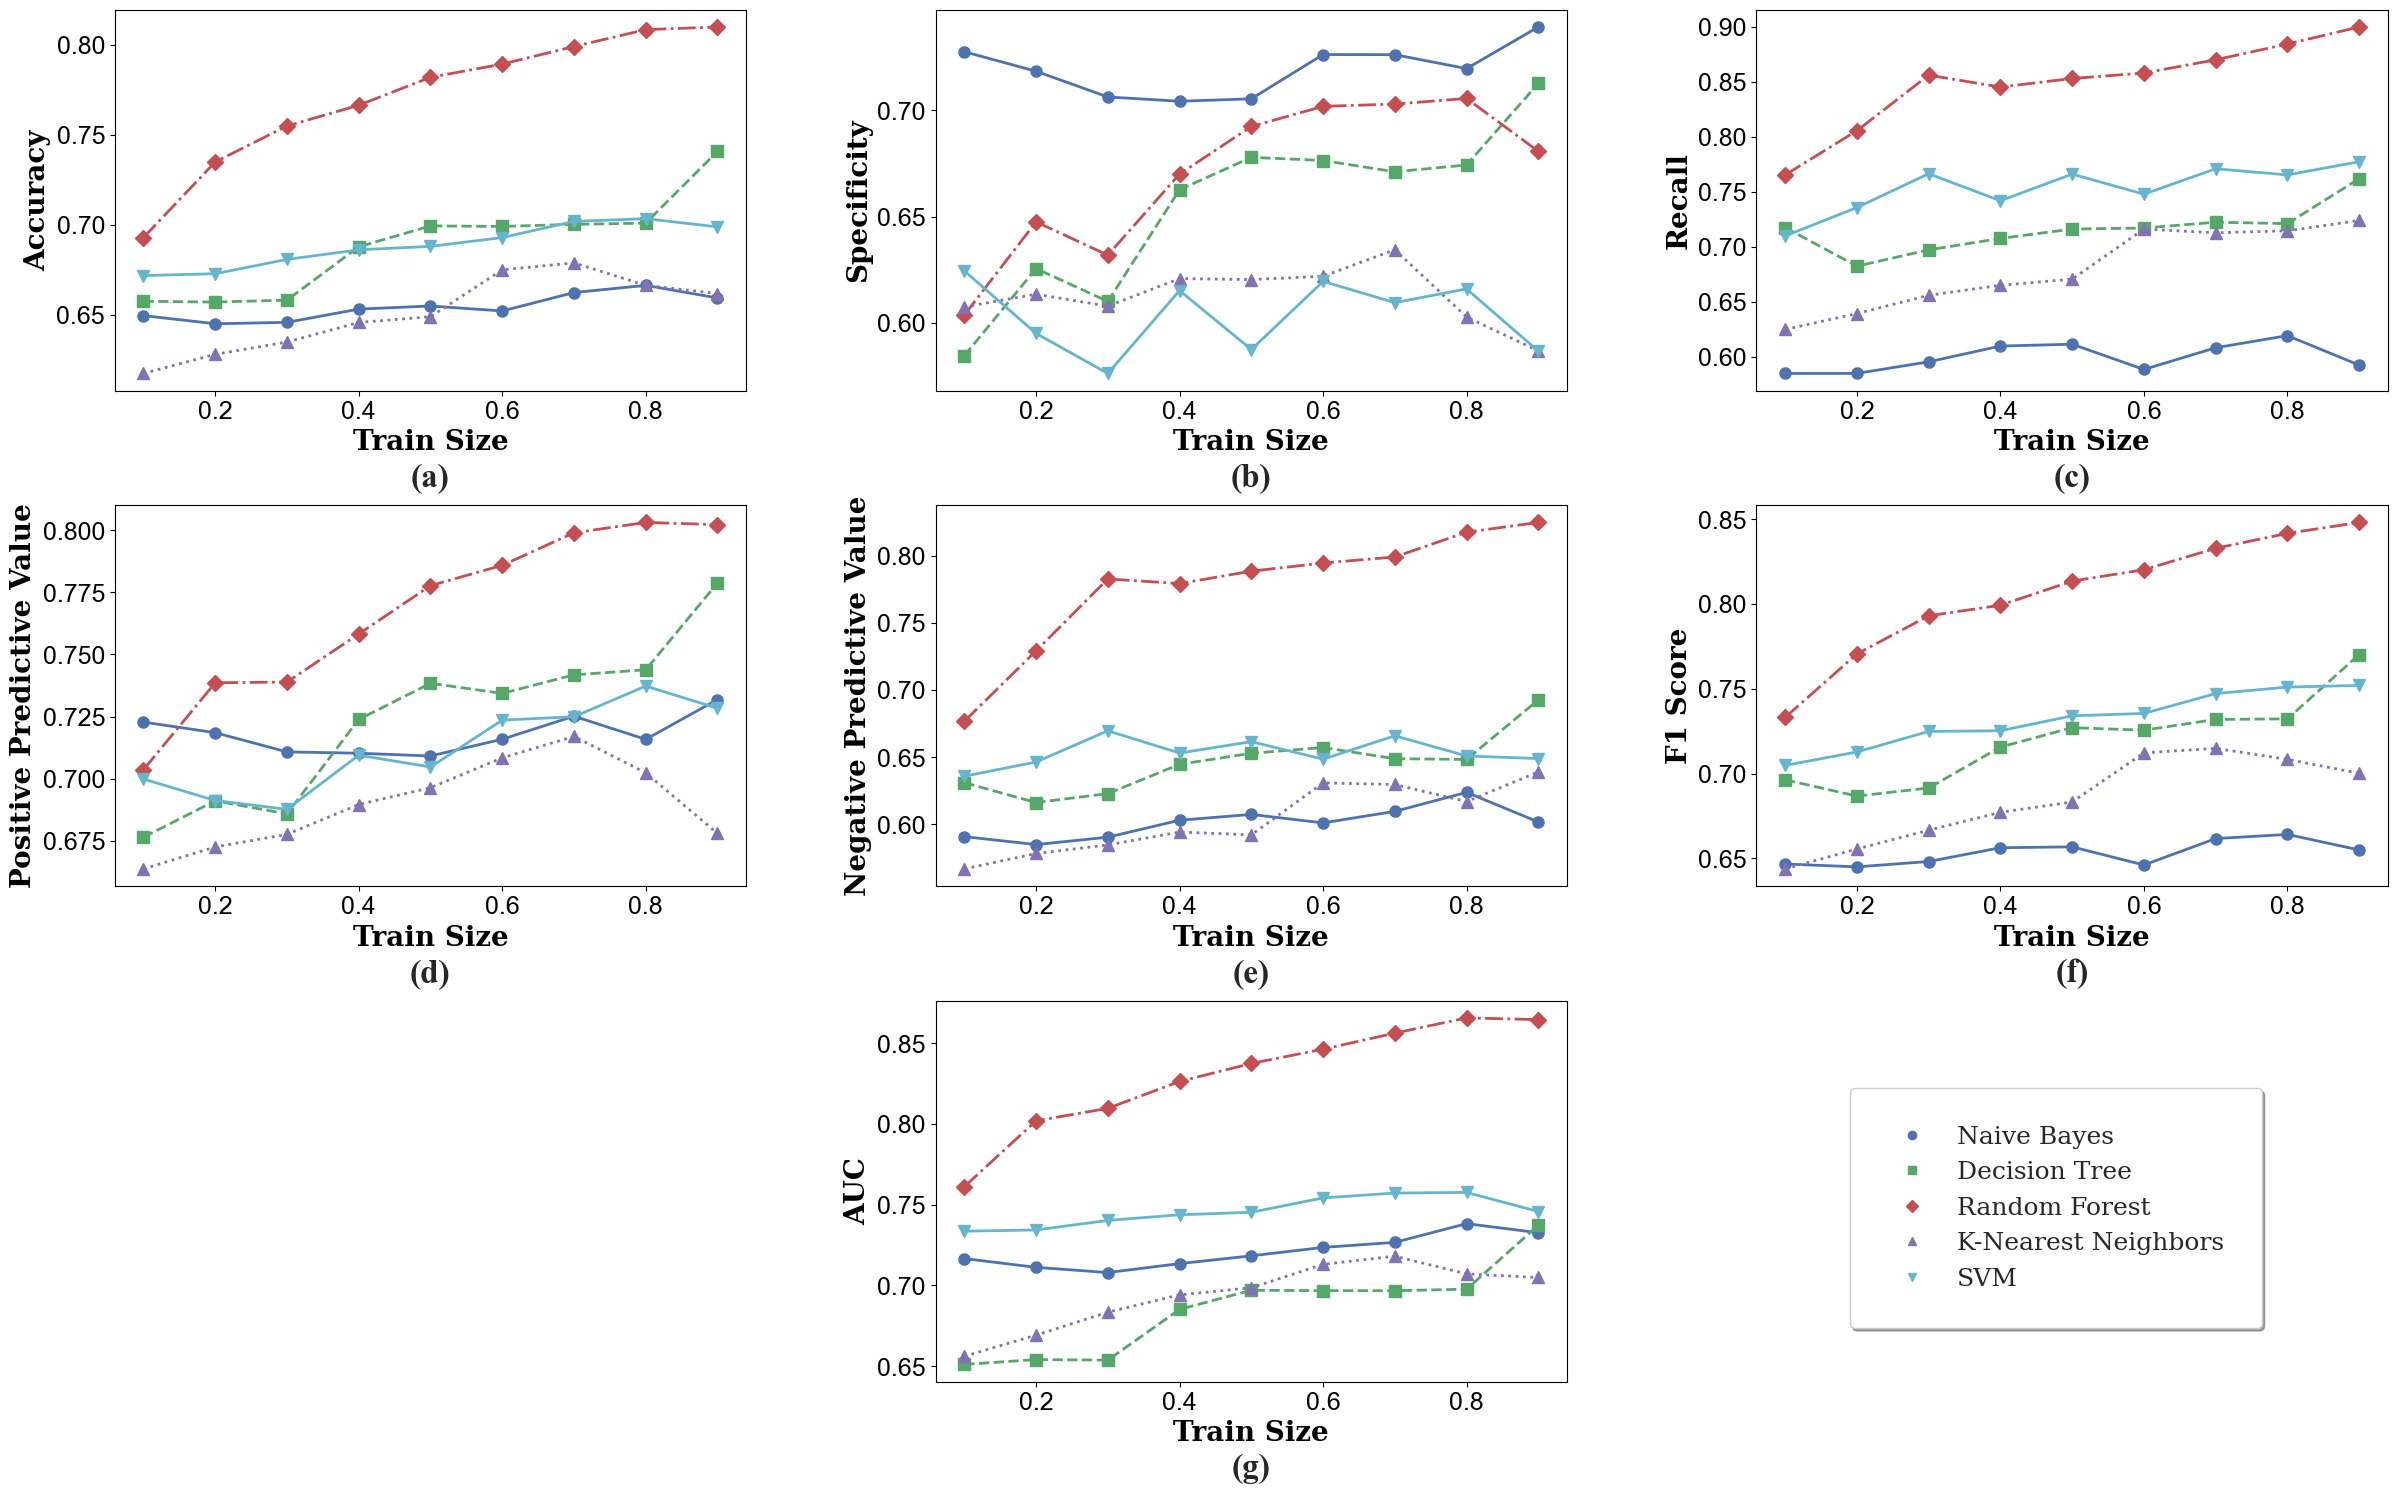

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(24, 15))  # Adjusted figsize for better fit
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=20, fontweight='bold', family='serif')

# Add label (a)
axes[0, 0].text(0.5, -0.25, '(a)', transform=axes[0, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=20, fontweight='bold', family='serif')

# Add label (b)
axes[0, 1].text(0.5, -0.25, '(b)', transform=axes[0, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=20, fontweight='bold', family='serif')

# Add label (c)
axes[0, 2].text(0.5, -0.25, '(c)', transform=axes[0, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[1, 0].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Positive Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (d)
axes[1, 0].text(0.5, -0.25, '(d)', transform=axes[1, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 1].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('Negative Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (e)
axes[1, 1].text(0.5, -0.25, '(e)', transform=axes[1, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 2].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('F1 Score', fontsize=20, fontweight='bold', family='serif')

# Add label (f)
axes[1, 2].text(0.5, -0.25, '(f)', transform=axes[1, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[2, 1].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[2, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[2, 1].set_ylabel('AUC', fontsize=20, fontweight='bold', family='serif')

# Add label (g)
axes[2, 1].text(0.5, -0.25, '(g)', transform=axes[2, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Hide any unused subplots
axes[2, 0].axis('off')
axes[2, 2].axis('off')

# Create a dummy plot to include the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(.95, 0.03), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 18, 'family': 'serif'})
dummy_plot.axis('off')  # Hide the axis for the dummy plot

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Images/7_ml_classifier_metrics.png', transparent=True)
# Show plot
plt.show()

In [11]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) / 9)
print('dtc: ', sum(accuracies_dtc) / 9)
print('rf: ', sum(accuracies_rf) / 9)
print('knn: ', sum(accuracies_knn)/ 9)
print('svm: ', sum(accuracies_svm) / 9)

Average Accuracy: 
nb:  0.6541982871197509
dtc:  0.6889158468876659
rf:  0.7708209760495476
knn:  0.6506839219455351
svm:  0.6884262490134445


In [12]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) / 9)
print('dtc: ', sum(specificities_dtc) / 9)
print('rf: ', sum(specificities_rf) / 9)
print('knn: ', sum(specificities_knn) / 9)
print('svm: ', sum(specificities_svm) / 9)

Average Specificity: 
nb:  0.7191872944465253
dtc:  0.6550510323209706
rf:  0.6707464155465875
knn:  0.6129803746141939
svm:  0.6034506920960659


In [13]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) / 9)
print('dtc: ', sum(recalls_dtc) / 9)
print('rf: ', sum(recalls_rf) / 9)
print('knn: ', sum(recalls_knn) / 9)
print('svm: ', sum(recalls_svm) / 9)

Average Recall: 
nb:  0.5997083785354094
dtc:  0.7159817393238602
rf:  0.8484267300688899
knn:  0.6804719656963633
svm:  0.7534875784624131


In [14]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) / 9)
print('dtc: ', sum(positive_predictive_values_dtc) / 9)
print('rf: ', sum(positive_predictive_values_rf) / 9)
print('knn: ', sum(positive_predictive_values_knn) / 9)
print('svm: ', sum(positive_predictive_values_svm) / 9)

Average PPV: 
nb:  0.7177895689990581
dtc:  0.7238070369233692
rf:  0.7674648176190191
knn:  0.6894975874262111
svm:  0.7118849597879575


In [15]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) / 9)
print('dtc: ', sum(npvs_dtc) / 9)
print('rf: ', sum(npvs_rf) / 9)
print('knn: ', sum(npvs_knn) / 9)
print('svm: ', sum(npvs_svm) / 9)

Average NPV: 
nb:  0.6014727485413806
dtc:  0.6461261294254971
rf:  0.7769546556553324
knn:  0.603658494047453
svm:  0.6534641446877338


In [16]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) / 9)
print('dtc: ', sum(f1_scores_dtc) / 9)
print('rf: ', sum(f1_scores_rf) / 9)
print('knn: ', sum(f1_scores_knn) / 9)
print('svm: ', sum(f1_scores_svm) / 9)

Average F1-Score: 
nb:  0.6533509524099013
dtc:  0.7197347199121651
rf:  0.8058431831662964
knn:  0.6847113422253437
svm:  0.7319673285776549


In [17]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) / 9)
print('dtc: ', sum(aucs_dtc) / 9)
print('rf: ', sum(aucs_rf) / 9)
print('knn: ', sum(aucs_knn) / 9)
print('svm: ', sum(aucs_svm) / 9)

Average AUC: 
nb:  0.7209995815026345
dtc:  0.6855163858224155
rf:  0.8299858123792369
knn:  0.6938703964118715
svm:  0.7458130976370932
